# Simple Linear Regression using sklearn Library

## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
df= pd.read_csv('Advertising.csv')

In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<strong> Dropping First Column "Unnamed: 0"


In [5]:
# Dropping the "Unnamed: 0" column
df1 = df.drop('Unnamed: 0',axis='columns') 

In [6]:
df1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Splitting the dataset into the Training set and Test set

In [8]:
x = df1[['TV','Radio','Newspaper']]
y = df1['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
X_train.head(10)

,TV,Radio,Newspaper
30,292.9,28.3,43.2
132,8.4,27.2,2.1
135,48.3,47.0,8.5
130,0.7,39.6,8.7
191,75.5,10.8,6.0
123,123.1,34.6,12.4
101,296.4,36.3,100.9
68,237.4,27.5,11.0
129,59.6,12.0,43.1
91,28.6,1.5,33.0


## Training the Simple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045317
Radio,0.188533
Newspaper,0.003733


## Predicting the Test set results

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r_squared= r2_score(Y_test, y_pred)

In [17]:
r_squared

0.8858865371519963

In [18]:
adjusted_r_squared_test = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1)

In [19]:
adjusted_r_squared_test

0.8763770819146627

In [20]:
df_check = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_check

,Actual,Predicted
59,18.4,18.008816
141,19.2,18.598294
31,11.9,11.404924
34,9.5,7.492456
93,22.2,21.385512
17,24.4,23.290540
77,14.2,13.750953
62,15.7,16.732635
2,9.3,12.555858
102,14.8,17.546010


## Visualising the  results

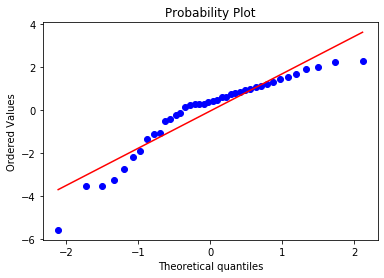

In [21]:
from scipy import stats
stats.probplot(Y_test-y_pred, plot=plt)
plt.show()

# Model evaluation metrics- Trianing Data

In [22]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, y_pred1)))

Mean Absolute Error: 1.2364458636432523
Mean Squared Error: 2.7235479069595128
Root Mean Squared Error: 1.6503175170128666


In [23]:
def mean_absolute_percentage_error(y_true, y_pred1): 
    return np.mean(np.abs((y_true - y_pred1) / y_true)) * 100

In [24]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_train, y_pred1))

Mean Absolute percentage error: 14.448573926402485


# Model evaluation metrics- Test Data

In [25]:
# Model evaluation metrics - Regression problems


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 1.3403882523365958
Mean Squared Error: 3.0853883971380394
Root Mean Squared Error: 1.756527368741529


In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_test, y_pred))

Mean Absolute percentage error: 12.061868920686498


# Training the Simple Linear Regression model on the Training set
# Without Intercept

In [28]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, y, test_size = 0.2)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train1, Y_train1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [32]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.053822
Radio,0.221635
Newspaper,0.014046


## Predicting the Test set results

In [33]:
y_pred1 = regressor.predict(X_test1)

In [34]:
from sklearn.metrics import r2_score
r_squared1= r2_score(Y_test1, y_pred1)

In [35]:
r_squared1

0.8508021048997375

In [36]:
adjusted_r_squared_test1 = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1)

In [37]:
adjusted_r_squared_test1

0.8763770819146627

## Visualising the  results

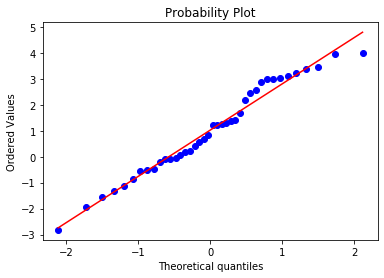

In [38]:
from scipy import stats
stats.probplot(Y_test1-y_pred1, plot=plt)
plt.show()

# Model evaluation metrics- Trianing Data

In [39]:
# Model evaluation metrics - Regression problems

y_pred_train = regressor.predict(X_train1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train1, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train1, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train1, y_pred_train)))

Mean Absolute Error: 1.516342578167977
Mean Squared Error: 4.066598258416645
Root Mean Squared Error: 2.0165808335934976


In [40]:
def mean_absolute_percentage_error(y_true, y_pred_train): 
    return np.mean(np.abs((y_true - y_pred_train) / y_true)) * 100

In [41]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_train1, y_pred_train))

Mean Absolute percentage error: 17.39534577305732


# Model evaluation metrics- Test Data

In [42]:
# Model evaluation metrics - Regression problems

y_pred_test = regressor.predict(X_test1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test1, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test1, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, y_pred_test)))

Mean Absolute Error: 1.604353411076005
Mean Squared Error: 4.024221575854941
Root Mean Squared Error: 2.0060462546648674


In [43]:
def mean_absolute_percentage_error(y_true, y_pred_test): 
    return np.mean(np.abs((y_true - y_pred_test) / y_true)) * 100

In [44]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_test1, y_pred_test))

Mean Absolute percentage error: 14.758245139278298
